In [1]:
# The 10-armed Testbed, Figure 2.2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def environment():
    """Returns values and states for 1000 timesteps."""
    values = np.random.normal(size = 10)
    states = np.array([np.random.normal(values) for t in range(1000)])
    return values, states

In [4]:
def agent():
    """Initiates estimated values and action counts."""
    Q = np.zeros(10)
    N = np.zeros(10)
    return Q, N

In [5]:
def greedy(Q):
    """Picks most valuable action with random tiebreak."""
    best_choices = np.flatnonzero(Q == Q.max())
    greedy_choice = np.random.choice(best_choices)
    return greedy_choice

In [6]:
def explore(Q):
    """Picks a random action."""
    explore_choice = np.random.choice(np.arange(Q.size))
    return explore_choice

In [7]:
def epsilon_greedy(Q, epsilon):
    """Picks a random action with epsilon probabilty. Greedy otherwise."""
    options = ['greedy', 'explore']
    probabilities = [1 - epsilon, epsilon]
    choice = np.random.choice(options, p = probabilities)
    
    if choice == 'greedy':
        return greedy(Q)
    elif choice == 'explore':
        return explore(Q)

In [8]:
def learn(Q, A, R, N):
    """Updates value estimate using the sample-average method."""
    N[A] = N[A] + 1
    Q[A] = Q[A] + (R - Q[A]) / N[A]
    return Q, N

In [9]:
def run(epsilon, runs):
    """Return average behavior given epsilon and number of runs."""
    rewards = np.zeros((runs, 1000))

    for run in range(runs):
        values, states = environment()
        Q, N = agent()

        for t, state in enumerate(states):
            A = epsilon_greedy(Q, epsilon)
            R = state[A]
            Q, N = learn(Q, A, R, N)

            rewards[run, t] = R
            
    avg_rewards = rewards.mean(axis = 0)
    return avg_rewards

In [10]:
# running for epsilon = 0, 0.01 and 0.1

runs = 2000

first = run(0, runs); print('First run complete.')
second = run(0.01, runs); print('Second run complete.')
third = run(0.1, runs); print('Third run complete.')

First run complete.
Second run complete.
Third run complete.


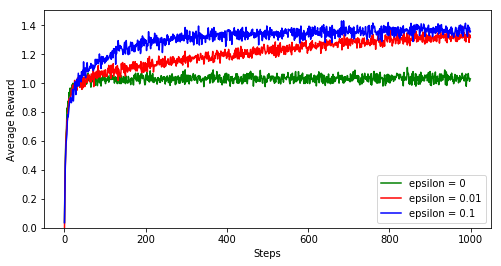

In [11]:
# plotting the results

plt.figure(figsize = (8, 4))
plt.plot(first, color = 'green', label = 'epsilon = 0')
plt.plot(second, color = 'red', label = 'epsilon = 0.01')
plt.plot(third, color = 'blue', label = 'epsilon = 0.1')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.ylim(bottom = 0)
plt.legend(loc = 4)

plt.show()